# Starting point

Physical processes:

- Gravity
- Radiation pressure 
- Gas cooling


Hypothesis:

- Star formation is the the result of the conversion of the gas mass.

Model:

- We haved a **Closed Box Model**: the total mass remains constant.
- The coefficent that gives us the efficiency in time of the conversion of the gas mass is called $\varepsilon$.

Physical Variables:

- $M_{gas}$
- $M_{stellar}$
- $M_{tot}$
- $ \varepsilon $

$$ SFR = \frac{dM_{stellar}}{dt} $$

$$ M_{stellar} = \int^t_{t_0} SFR (t') dt'$$

We call the coefficient that relates $M_{gas}$ with the $SFR$ $ \varepsilon $ :

$$ SFR(t) = \varepsilon M_{gas}(t) $$

We assumed a closed box model where $M_{tot}$ is fixed. There is no exchange of matter with the universe.
This means that $M_{tot}$ is a constant.

$$ SFR = - \frac{dM_{gas}}{dt} = \varepsilon M_{gas}(t) $$

Solving this differential equation we get 

$$ M_{gas}(t) = e^{-\varepsilon t} M_{gas}(t=0) $$

$$ SFR(t) = \varepsilon e^{-\varepsilon t} M_{tot} $$

If we substitute the formula we just got for the $SFR$ into the integral for the $M_{Stellar}$ and consider $t_0 = 0$ we get

$$ M_{stellar} = \int^t_0 \varepsilon e^{-\varepsilon t'} M_{tot} dt'$$

$$ M_{stellar} = M_{tot}\left ( 1 - e^{- \varepsilon t} \right ) $$

The Specific $SFR$ then becomes 

$$ \frac{SFR}{M_{stellar}} =  \frac{\varepsilon e^{-\varepsilon t}}{\left ( 1 - e^{- \varepsilon t} \right )}$$

where the only free parameter are $\varepsilon$ and $t$ .

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def SpecificSFR(epsilon, time):
    return epsilon*np.exp(-epsilon*time)/(1-np.exp(-epsilon*time))*10**(-9)

def SFRFunction(espsilon, time, Mstellar):
    return epsilon*np.exp(-epsilon*time)/(1-np.exp(-epsilon*time))*Mstellar

In [4]:
epsilon = 0.1
times = [1,3,7,14]
Mstellar = np.logspace(8,12,100)

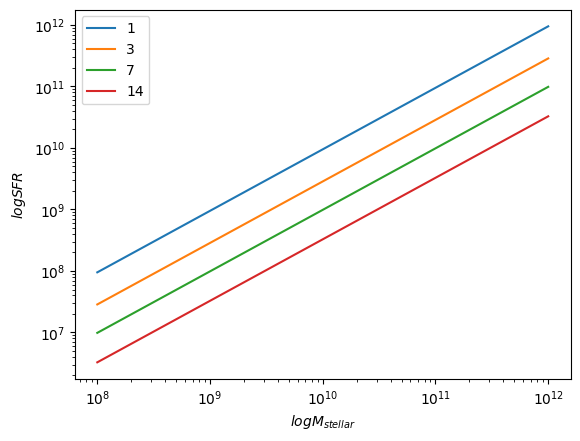

In [6]:
for t in times:
    plt.plot(Mstellar,SFRFunction(epsilon,t,Mstellar),label=t)
    
plt.loglog()
plt.xlabel("$logM_{stellar}$")
plt.ylabel("$logSFR$")
plt.legend()
plt.show()

/var/folders/bn/dxj8hlps2pg80dtyf5qjb_340000gn/T/ipykernel_889/2240936584.py:2: RuntimeWarning: divide by zero encountered in divide
  return epsilon*np.exp(-epsilon*time)/(1-np.exp(-epsilon*time))*10**(-9)


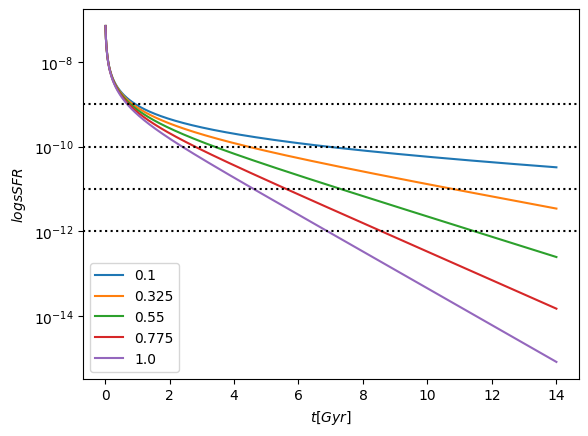

In [7]:
epsilon = np.linspace(0.1,1,5)
time = np.linspace(0,14,1000)

lines = [10**(-9),10**(-10),10**(-11),10**(-12)]

for e in epsilon:
    plt.plot(time,SpecificSFR(e,time),label=e)
    
for i in lines:
    plt.axhline(i, c='black', ls='dotted')

plt.semilogy()
plt.xlabel("$t[Gyr]$")
plt.ylabel("$logsSFR$")
plt.legend()
plt.show()

/var/folders/bn/dxj8hlps2pg80dtyf5qjb_340000gn/T/ipykernel_1732/2240936584.py:2: RuntimeWarning: divide by zero encountered in divide
  return epsilon*np.exp(-epsilon*time)/(1-np.exp(-epsilon*time))*10**(-9)


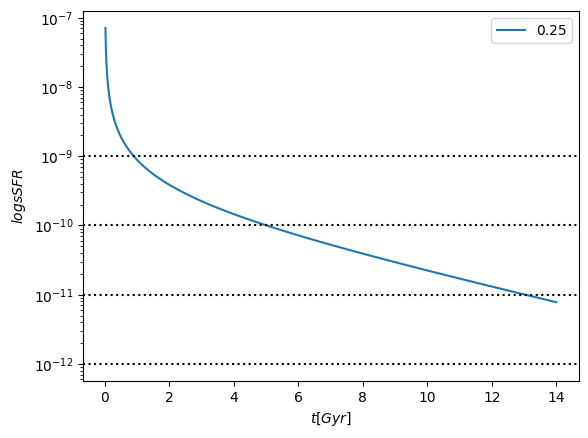

In [161]:
e = 0.25 # DAL PAPER (in Gyr^(-1))
time = np.linspace(0,14,1000)

lines = [10**(-9),10**(-10),10**(-11),10**(-12)]

plt.plot(time,SpecificSFR(e,time),label=e)
    
for i in lines:
    plt.axhline(i, c='black', ls='dotted')

plt.semilogy()
plt.xlabel("$t[Gyr]$")
plt.ylabel("$logsSFR$")
plt.legend()
plt.show()

This doesn't explain the second population where $log(sSFR) = -12$. We need to relax some assumptions of the model.
In particular we need to consider that we are not in a **Closed Box**, but we have some exchange of gas with the outer region.

# Open Box Model

$$
    \frac{dm_{gas}(t)}{dt} = \dot{m}^{in}_{gas} - \dot{m}^{out}_{gas} - \varepsilon m_{gas}(t)
$$

Physical processes:




Hypothesis:



Physical Variables:

- $\dot{m}_{vir}^{in}$

$$
    \dot{m}_{vir}^{in} = 
$$

$$
    \dot{m}_{gas}^{in} = \xi \left ( f \dot{m}_{vir}^{in} \right ) 
$$


We have to impose the condition $t_{cooling} < t_{ff}$, which leads to

$$
    \begin{cases}
        \xi = 0 & \text{ for $M_{\odot}^9 > M_{vir} \lor M_{vir} > M_{\odot}^{11}$} \\
        \xi = \xi \left ( =1 \right) & \text{ for $M_{\odot}^9 < M_{vir} < M_{\odot}^{11}$}
    \end{cases}
$$

for $z = Z = 0$.

Then we start to consider the fraction of the gas that outflows from the galaxy, $\dot{m}_{gas}^{out}$. We can make some assumptions about what processes cause this outflow.

**-Type Ia Supernovae**

They live for a long period of time so to compute their contribution I should integrate the $SFR$ between a specific period of time before multiplying for an efficiency. It is complicated.

**-Type Ib Supernovae** 

They live for a short period of time so they depend directly on $SFR$.

$$
    \dot{m}_{gas}^{out} = \eta SFR
$$

Where $\eta$ is the explosion rate of Type Ib Supernovae.

**-Ram Pressure Stripping**

**-AGN**




Let's by considering only the contibution of Type Ib SUpernovae.

$$
    \frac{dm_{gas}(t)}{dt} = \dot{m}^{in}_{gas} - \left( \eta + 1\right ) SFR
$$


We can assume a dynamical equilibrium, which means $\frac{dm_{gas}(t)}{dt} = 0$

$$
    \left( \eta + 1\right ) SFR = \dot{m}^{in}_{gas} = 3 \xi f \left[ G\frac{4\pi}{3}200\right]^{1/2} \sqrt{\rho_0}\left( 1+z\right )^{3/2} m_{vir} \propto 3 f \left[ G\frac{4\pi}{3}200\right]^{1/2} \sqrt{\rho_0} \frac{3H_0}{2} t^{-1} m_{vir}
$$

$$
    C = 3 f \left[ G\frac{4\pi}{3}200\right]^{1/2} \sqrt{\rho_0}\frac{3H_0}{2}\frac{1}{\left( \eta + 1\right )}
$$



$$
    SFR =  C \frac{m_{vir}}{t} \propto C \xi \frac{m_{stellar}}{t}
$$

From this [paper](https://arxiv.org/pdf/2001.02230.pdf) from Girelli.

$$
    ln(m_{vir}) = \frac{4 A(z)}{M_A} ln(m_{stellar})
$$


# 30/05/23

\begin{equation}
    sSFR \propto \frac{(1+z)^{3/2}}{m_{vir}(t)(1+\eta(...))}
\end{equation}

The sSFR is constant only if $(1+\eta) \propto m_{vir}^{-1}$, for $\eta \gg 1$, then $\eta \propto m_{vir}^{-1}$

## Option 1

Make some assumptions about $\eta$, so that $\eta \propto m_{vir}^{-1}$

## Option 2
\begin{equation}
    \frac{dm_g}{dt} \neq 0
\end{equation}

Let's work on option 1. If we consider $\eta$ as the fraction of the ejecta that has a velocity that is greater than the escape velocity over the total ejecta

Let's compute the escape velocity for a particle of gas and the initial velocity of the ejecta of the Supernovae

\begin{equation}
    v_{escape}(r) = \sqrt{\frac{2GM}{r_{vir}}}
\end{equation}

\begin{equation}
    v_0 = \sqrt{\frac{2E_{supernovae}}{m_g^{out}}}
\end{equation}

\begin{equation}
\begin{split}
    \frac{m_g^{out}}{2}v_0^2 - \frac{GMm_g^{out}}{r_{vir}} < 0 \\
    \frac{m_g^{out}}{2}v_0^2 - \frac{Gm_{vir}m_g^{out}}{r_{vir}} = - \frac{Gm_{vir}m_g^{out}}{r_{fin}}
\end{split}
\end{equation}

\begin{equation}
    r_{fin} = \frac{v_0^2 r_{vir}^2}{2Gm_{vir}}
\end{equation}

$r_{fin} \rightarrow t$ 

\begin{equation}
    t \propto m_{vir}^{-2/3}
\end{equation}

\begin{equation}
    \eta 
\end{equation}

